In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Lets create sysnthetic datapoints
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)


In [3]:
X

array([[ 2.49576629, -0.80673128],
       [ 0.0872666 ,  1.83072945],
       [ 1.40899086, -1.2114492 ],
       ...,
       [ 0.58767395, -0.35778617],
       [-1.86309652,  0.62262499],
       [-0.69459365, -1.62608063]])

In [4]:
y

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [6]:
pd.DataFrame(X)

,0,1
0,2.495766,-0.806731
1,0.087267,1.830729
2,1.408991,-1.211449
3,0.959561,-0.992322
4,1.274143,-1.136619
...,...,...
995,-1.237616,0.459504
996,-1.776421,0.328085
997,0.587674,-0.357786
998,-1.863097,0.622625


In [14]:
pd.DataFrame(X[0])

,0
0,2.495766
1,-0.806731


<Axes: xlabel='0', ylabel='1'>

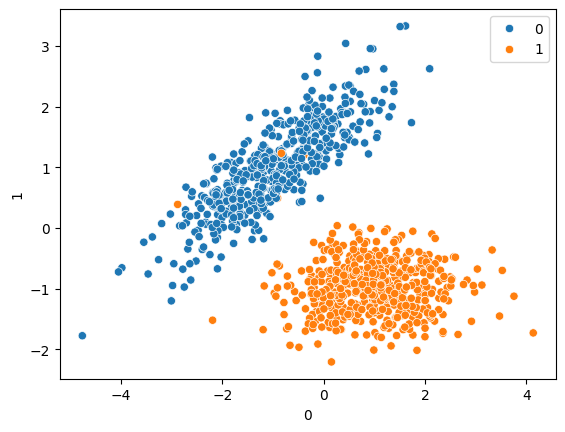

In [18]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
from sklearn.svm import SVC

In [23]:
svc=SVC(kernel='linear') 

In [24]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
y_pred=svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       130

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[120   0]
 [  0 130]]


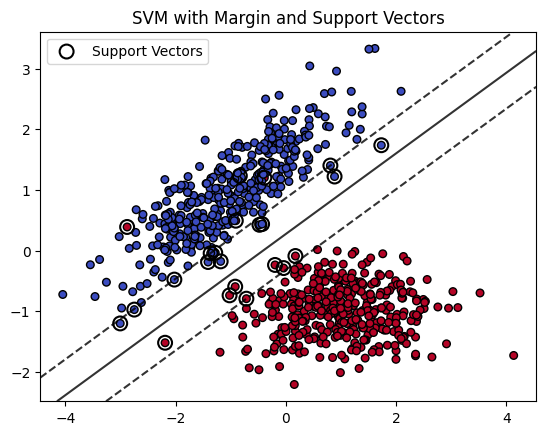

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm_margin(clf, X, y):
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])

    plt.title("SVM with Margin and Support Vectors")
    plt.legend()
    plt.show()

# Call it on your trained model
plot_svm_margin(svc, X_train, y_train)


## Non linear With RBF kernel

In [31]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)


<Axes: xlabel='0', ylabel='1'>

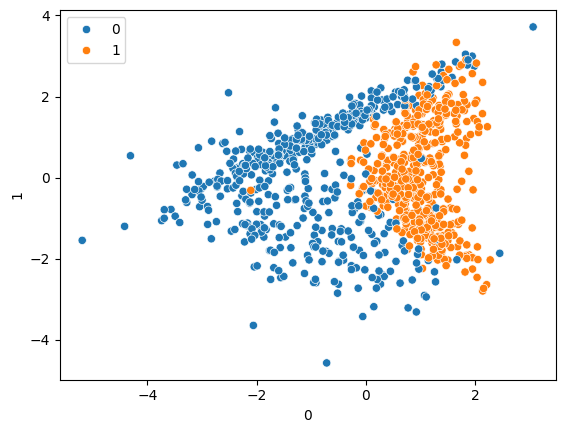

In [32]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [33]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

y_pred_rbf = svc_rbf.predict(X_test)

print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       130

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



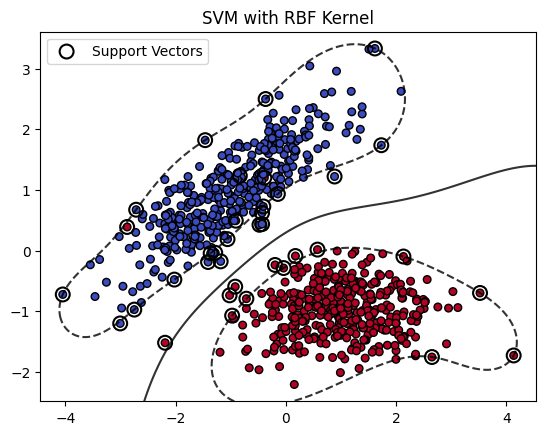

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm_rbf(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # Support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

    # Grid for decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Decision boundary and margin
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])

    plt.title("SVM with RBF Kernel")
    plt.legend()
    plt.show()

# Call for your trained RBF SVM
plot_svm_rbf(svc_rbf, X_train, y_train)


## Polynomial Kernel

In [36]:
# Polynomial kernel

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

y_pred_poly = svc_poly.predict(X_test)

print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.99      1.00      1.00       130

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



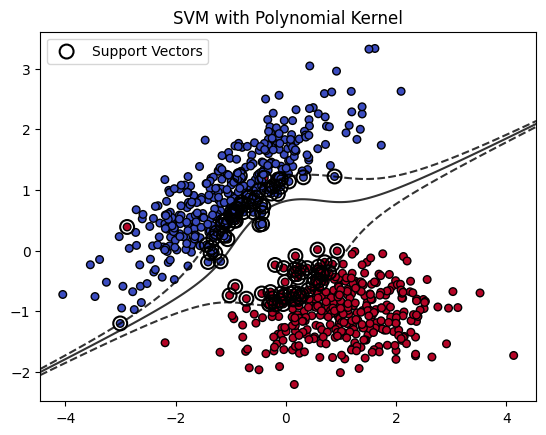

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm_poly(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # Highlight support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")

    # Create grid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary & margins
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])

    plt.title("SVM with Polynomial Kernel")
    plt.legend()
    plt.show()

# Call for your trained polynomial SVM
plot_svm_poly(svc_poly, X_train, y_train)


## Sigmoid Kernel

In [38]:
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = svc_sigmoid.predict(X_test)

print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       0.98      0.97      0.97       130

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



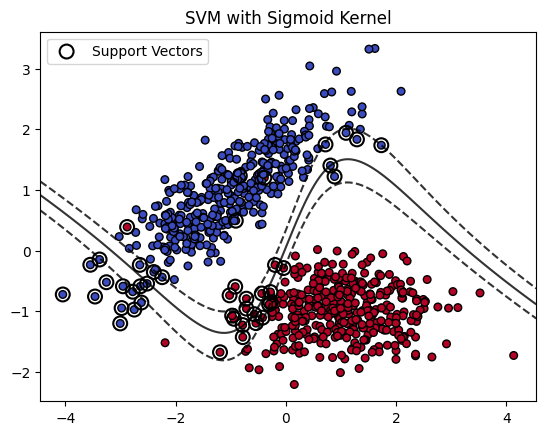

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm_sigmoid(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # Support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")

    # Grid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Decision boundary & margins
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])

    plt.title("SVM with Sigmoid Kernel")
    plt.legend()
    plt.show()

# Call for your trained sigmoid SVM
plot_svm_sigmoid(svc_sigmoid, X_train, y_train)


# Hyperparameter Tuning with GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [47]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [48]:
grid.best_score_

0.9946666666666667

In [49]:
print(svc.coef_)
print(svc.intercept_)

[[ 1.12294163 -1.69058618]]
[0.46064594]
